# Plotting with matplotlib
There are many libraries available for ploting, but the `default` is `matplotlib`. Another useful is `seaborn`

In [8]:
# import library
import matplotlib.pyplot as plt
import pandas as pd

# magic function

%matplotlib inline

In [2]:
# First plot
x = [i for i in range(0,10)]
y = [i**2 for i in x]

Text(0, 0.5, 'y')

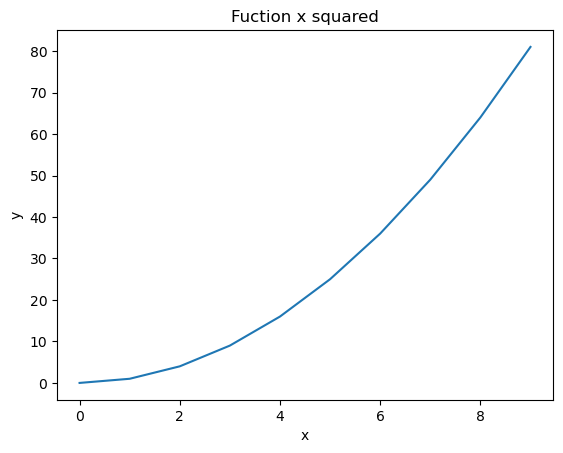

In [3]:
plt.plot(x,y)
plt.title('Fuction x squared')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'square root of x')

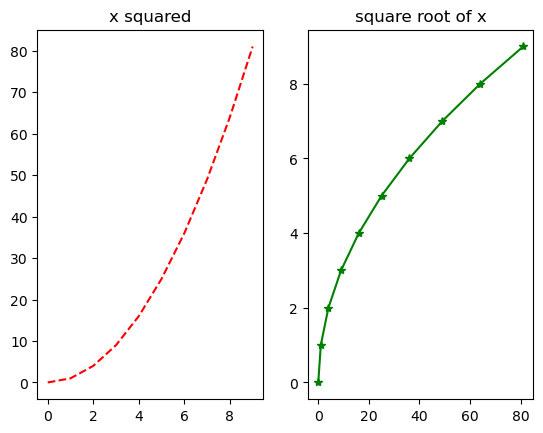

In [4]:
# more than one plot using plt.subplot(rows,columns,plotnumber) 
plt.subplot(1, 2, 1) 
plt.plot(x,y,'r--') # r-- stands for red and -- for dashed
plt.title('x squared')

# second plot
plt.subplot(1, 2, 2)
plt.plot(y,x, 'g*-') # g for green and *- for type of the line
plt.title('square root of x')

# OOP aproach
There are two ingridients: `Figure` and `Axes`

`Figure` is the canvas in the background and `Axes` are the actual plots

In [5]:
# create variables
x = [i for i in range(0, 10)]
y = [i**2 for i in x]

Text(0.5, 1.0, 'Graph of x squared')

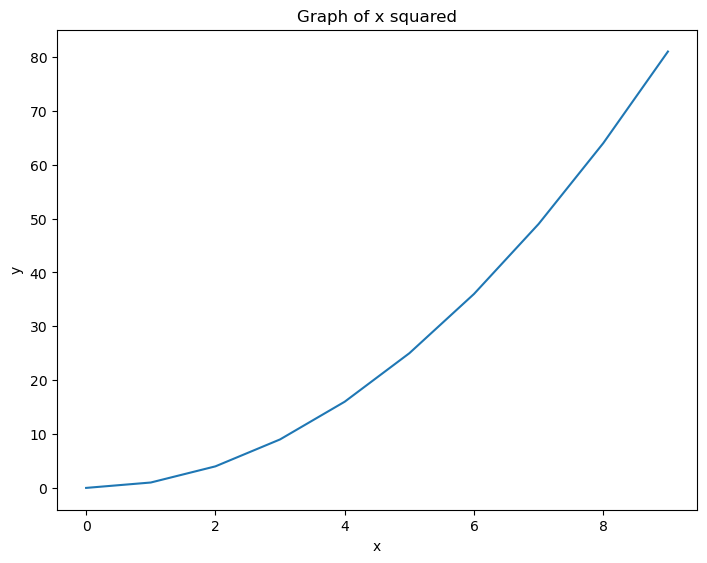

In [6]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height
axes.plot(x,y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Graph of x squared')

Text(0.5, 1.0, 'square root of x')

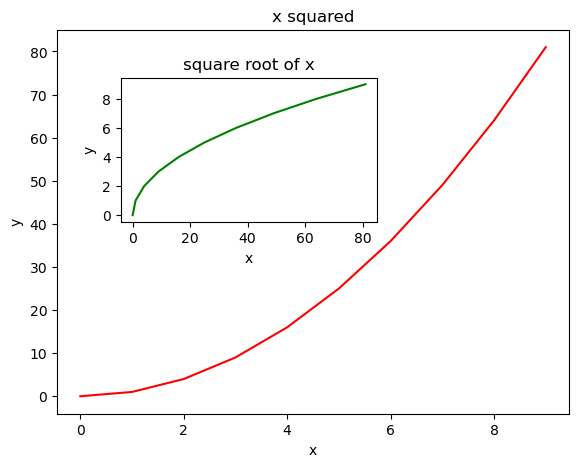

In [10]:
# creating a plot within a plot
fig = plt.figure()

# we need to creat 2 axes
axes1 = fig.add_axes([0,0,0.8,0.8])
axes2 = fig.add_axes([0.1,0.4,0.4,0.3])

# main figure
axes1.plot(x,y,'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('x squared')

# smaller figure
axes2.plot(y,x,'g')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('square root of x')

# Application to stock market data
We are going to use on of Gabor's data sets, but we can also check out `yfinance`

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('https://osf.io/4pgrf/download')

In [13]:
df.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [14]:
df.shape

(304859, 8)

In [16]:
df.ticker.value_counts()

XLNX    5287
SYMC    5287
TXN     5287
IT      5287
SNPS    5287
        ... 
ANET    1152
KEYS    1058
QRVO    1007
PYPL     881
HPE      807
Name: ticker, Length: 68, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304859 entries, 0 to 304858
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticker          304859 non-null  object 
 1   ref.date        304859 non-null  object 
 2   price.open      304859 non-null  float64
 3   price.close     304859 non-null  float64
 4   price.adjusted  304859 non-null  float64
 5   price.low       304859 non-null  float64
 6   price.high      304859 non-null  float64
 7   volume          304859 non-null  float64
dtypes: float64(6), object(2)
memory usage: 18.6+ MB


In [19]:
df['ref.date'] = pd.to_datetime(df['ref.date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304859 entries, 0 to 304858
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticker          304859 non-null  object        
 1   ref.date        304859 non-null  datetime64[ns]
 2   price.open      304859 non-null  float64       
 3   price.close     304859 non-null  float64       
 4   price.adjusted  304859 non-null  float64       
 5   price.low       304859 non-null  float64       
 6   price.high      304859 non-null  float64       
 7   volume          304859 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 18.6+ MB


In [23]:
print(type(df['ref.date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [26]:
# plot data for msft
date = list(df.loc[df['ticker'] == 'MSFT']['ref.date'])
price  =  list(df.loc[df['ticker'] == 'MSFT']['price.close'])

Text(0, 0.5, 'Closing price')

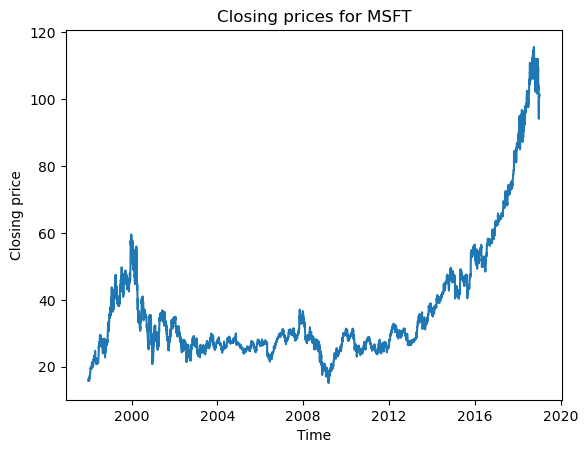

In [27]:
plt.plot(date,price)
plt.title('Closing prices for MSFT')
plt.xlabel('Time')
plt.ylabel('Closing price')

In [32]:
# use OOP paradigm to add average price to plot
mean_price = np.mean(price)

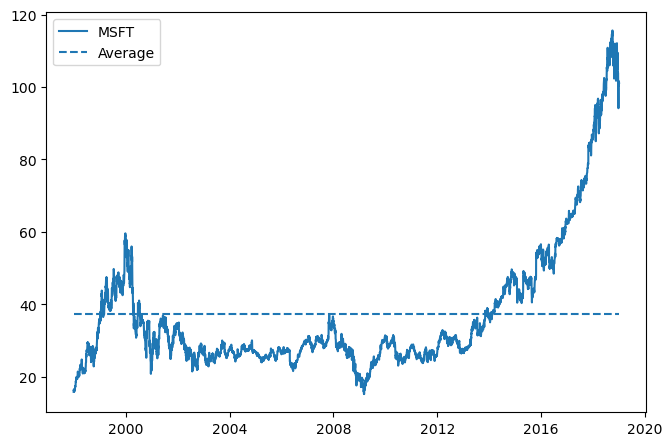

In [37]:
# craete a figure

fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(date, price, label = 'MSFT')
ax.hlines(y=mean_price, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'Average')
plt.legend(loc = 'upper left')